<a href="https://colab.research.google.com/github/sravyagadam/EDA_Capstone/blob/main/Copy_of_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import plotly.offline as pyo
import plotly.graph_objs as go

# cloning from git and retrieving the data loading the same into data frame

In [4]:
!git clone https://github.com/sravyagadam/EDA_Capstone.git

Cloning into 'EDA_Capstone'...
remote: Enumerating objects: 57, done.
remote: Counting objects: 100% (57/57), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 57 (delta 27), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (57/57), done.


In [5]:
% cd EDA_Capstone/

/content/EDA_Capstone


In [6]:

airbnb=pd.read_csv('Airbnb NYC 2019.csv')
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


**Categorical Features**

The categorical features present in this dataset are the following :


*   neighbourhood — 5
*   neighbourhood-221

*   room_type — 3 categories
*   hosts - 11453


In [ ]:
airbnb['neighbourhood_group'].unique()
airbnb['neighbourhood'].unique()

airbnb['room_type'].unique()


11453

# finding the null/NA values and cleaning them (replacing with zero)

In [ ]:
#airbnb.shape
airbnb.isna().sum()


id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
airbnb['number_of_reviews'].fillna(0,inplace=True)

In [ ]:
# time for cleaning the data set check if any null values are there and remove them / make it as 0
airbnb['reviews_per_month'].fillna(0,inplace=True)

# finding out the total number of records available as per the neighbourhood group 
# as per the pie chart it is evident that manhattan and brooklyn has major occupancy 


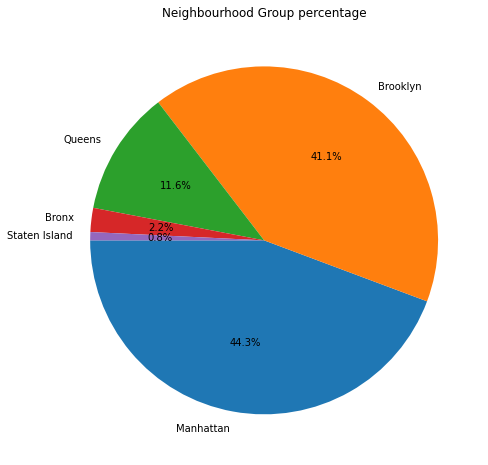

In [8]:

plt.figure(figsize=(8,8))
plt.pie(airbnb.neighbourhood_group.value_counts(), labels=airbnb.neighbourhood_group.value_counts().index,autopct='%1.1f%%', startangle=180)
plt.title('Neighbourhood Group percentage')
plt.show()

# Data is checked for the top most neighbourhood values out of which major number of data is available in manhattan and brooklyn
#below are the top 10 records out of which all are available in manhattan and brooklyn

In [ ]:
airbnb.neighbourhood.value_counts().head(10)

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

total number of neighbourhood  221


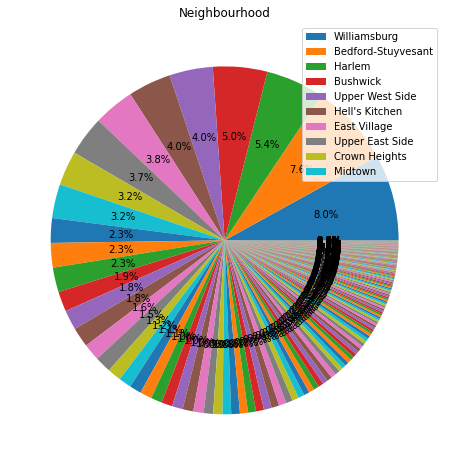

In [ ]:
labels = airbnb.neighbourhood.value_counts().index
print ("total number of neighbourhood ",len(labels))
shape = airbnb.neighbourhood.value_counts().values
plt.figure(figsize=(8,8))
plt.pie(shape, autopct = '%1.1f%%')
plt.legend(airbnb.neighbourhood.value_counts().head(10).index)
plt.title('Neighbourhood')
plt.show()

#grouping the records with neighbourhood group and number of reviews 
# displaying the same in bar graph which shows the major reviews are also avilable in manhattan and brooklyn

In [ ]:
airbnb.nlargest(100, 'number_of_reviews')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
11759,9145202,Room near JFK Queen Bed,47621202,Dona,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,2019-07-05,14.58,2,333
2031,903972,Great Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,2019-06-21,7.75,3,293
2030,903947,Beautiful Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,2019-06-23,7.72,3,342
2015,891117,Private Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,2019-06-15,7.57,3,339
13495,10101135,Room Near JFK Twin Beds,47621202,Dona,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,2019-06-27,13.40,2,173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7317,5390882,Charming Bedroom in Harlem,27944388,Charles,Manhattan,East Harlem,40.80226,-73.94506,Private room,70,1,325,2019-06-19,6.19,1,108
22100,17777654,Bright Comfy Quiet Room Just 6 Mins from JFK!,121391142,Deloris,Queens,Springfield Gardens,40.66600,-73.76333,Private room,65,1,325,2019-06-12,11.72,2,0
116,26969,2 story family home in Williamsburg,115307,Alexandra,Brooklyn,Williamsburg,40.71942,-73.95748,Entire home/apt,325,3,324,2019-06-23,3.01,1,107
2111,962045,"Private Room & Coffee, only 3 blocks to Train",5239845,Deanna,Brooklyn,Bushwick,40.69288,-73.90374,Private room,62,2,324,2019-06-28,4.30,1,267


In [ ]:
#airbnb_1=airbnb.nlargest(100, 'number_of_reviews')

#airbnb_reviews=airbnb.groupby('neighbourhood_group').count()
#airbnb_reviews
#airbnb_reviews=airbnb.groupby('neighbourhood').count()

neigh_grp_reviews=airbnb[['neighbourhood_group','number_of_reviews']]
neigh_grp_reviews=neigh_grp_reviews.groupby(by='neighbourhood_group')
airbnb_reviews=neigh_grp_reviews.sum()
airbnb_reviews
#price_avg=airbnb.number_of_reviews.mean();
#print ("reviews",price_avg)

,number_of_reviews
neighbourhood_group,
Bronx,28371
Brooklyn,486574
Manhattan,454569
Queens,156950
Staten Island,11541


In [ ]:
reviews_grouped=airbnb[['neighbourhood_group','number_of_reviews']].groupby(by='neighbourhood_group').sum().reset_index()

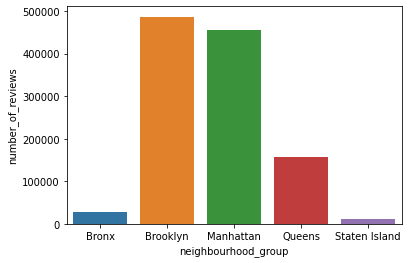

In [ ]:
sns.barplot(data=reviews_grouped,x='neighbourhood_group',y='number_of_reviews')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



<Figure size 720x576 with 0 Axes>

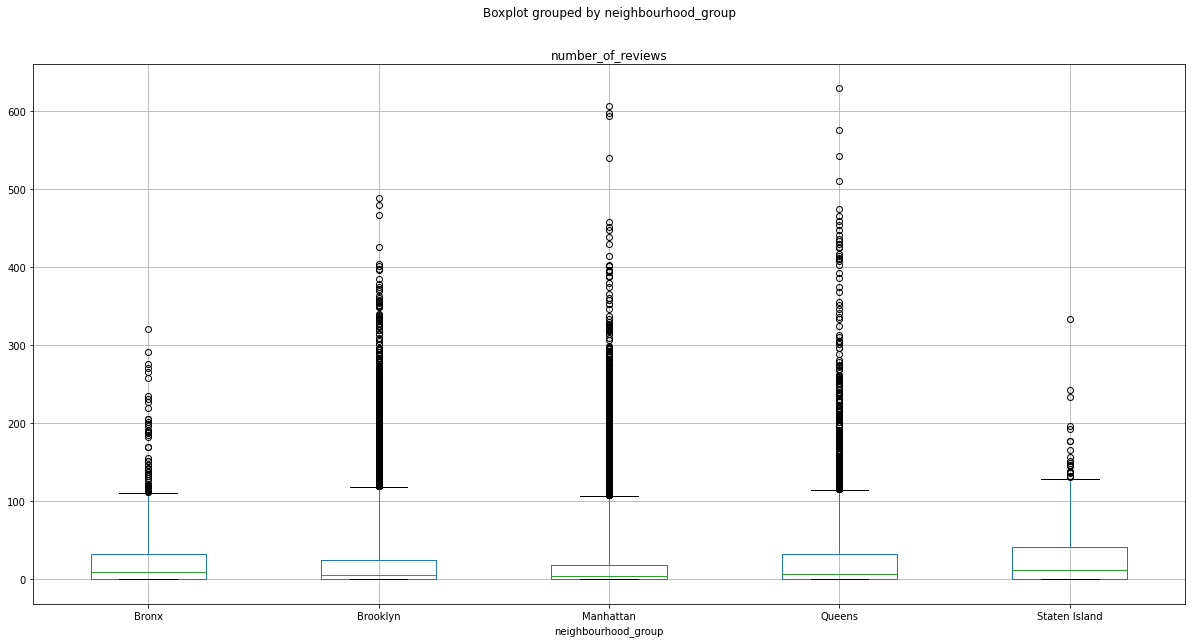

In [ ]:

fig = plt.figure(figsize=(10,8))
plt.suptitle('')

axes = airbnb.boxplot(column='number_of_reviews',layout=(1,1), figsize=(20,10),
                   whis=[5,95], by='neighbourhood_group', return_type='axes')

plt.show()


# Conclusion from the analysis:
#we know where are the listings located, found out that manhattan and brooklyn are dominating the listing number and have the highest price range, review numbers 
